# Ejercicio 13


## Utilizar NLP para analizar las tareas del curso


In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import re

import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_excel('Consolidado_respuestas_escribir_v2.xlsx')

In [3]:
data

,ID,Genero,Carrera de pregrado,Sector en el que trabaja,Edad,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E12 - Natural Language Processing Overview
0,1,M,Matemáticas,Estudio de mercados,30.0,Dentro de las diferentes aplicaciones que tien...,La principal diferencia entre las series de ti...,Los arboles de decisión son herramienta de Mac...,Al proponer un método para realizar una predic...,Durante el desarrollo de soluciones dentro de ...,La empresa kore.ai se especializa en la implem...
1,2,M,NaN,NaN,NaN,NaN,una serie de tiempo se enfoca en un individio ...,NaN,NaN,Un micro servicio es una parte de la arquitect...,NaN
2,3,M,NaN,NaN,NaN,Mercados energeticos: Tras la liberación y des...,Los datos de series de tiempo son un conjunto ...,NaN,Los metodos de ensamble nos permiten mejorar e...,Los microservicios defininen una nueva metodol...,NaN
3,4,M,Estadistica,Financiero,28.0,Las series de tiempo son una colección de obse...,Los datos de series de tiempo son un conjunto ...,Un árbol de decisión es una especie de mapa en...,Los métodos de ensamble de modelos o métodos c...,Los microservicios son tanto un estilo de arqu...,La función de autocompletar las palabras en Wh...
4,5,M,NaN,NaN,NaN,"1. Actualmente, la empresa de mascotas Laika q...",Un conjunto de datos de una serie de tiempo co...,NaN,Los modelos de ensamble consisten en mezclar l...,Los microservicios son tanto un estilo de arqu...,NaN
5,6,M,Estadística,Público,30.0,Las series de tiempo desempeñan un papel funda...,Las series tiempo son una secuencia de datos o...,Los árboles de decisión son uno de los modelos...,NaN,Los microservicios son un tipo de arquitectura...,\nGPT-2 - OpenAI\nGenerative Pre-trained Trans...
6,7,M,Ingeniería de Sistemas,Educación,33.0,1. Predicción de precios de acciones\n2. Análi...,La diferencia entre las series de tiempo y los...,Los árboles de decisión son modelos de predicc...,NaN,Los microservicios es una metodología de desar...,https://www.grammarly.com/\nGrammarly\nEsta ap...
7,8,M,NaN,NaN,NaN,"Precio de acciones en la bolsa, sujeto a las t...",Una serie de tiempo es un conjunto de datos or...,NaN,NaN,A nivel general los Microservicios son pequeño...,NaN
8,9,M,Ingeniería Electrónica,Consultoría,44.0,Pronóstico del tiempo: Dado el comportamiento ...,La diferencia entre series de tiempo y datos p...,Los tipos de árboles de decisión se basan en e...,Hay tres razones principales por las que los m...,Los microservicios son servicios desplegados i...,La Fiscalía General de la Nación implementó en...
9,10,M,Finanzas,Financiero,25.0,1) Comportamiento del precio del dólar. Usando...,The main difference between panel data and tim...,NaN,Los modelos de ensambles son una estrategia ex...,Un microservicio es una forma de desarrollo en...,Whale & Jaguar es una compañía que se especial...


In [4]:
#Preparación de los Datos
data = data.rename(columns={'Carrera de pregrado':'Pregrado','Sector en el que trabaja':'Sector','E1 - Examples of Time Series Analysis': 'E1', 'E4 - Panel Data':'E4', 
                           'E6 - Decison Trees':'E6', 'E8 - Ensemble Trees Overview':'E8',
                           'E10 - REST-API':'E10', 'E12 - Natural Language Processing Overview':'E12'})

text_questions= list(data.drop(["ID","Genero", "Pregrado","Sector", "Edad"], axis=1))
data['X'] = data[text_questions].fillna('').sum(axis=1)

data=data.drop(data.iloc[:, [5,6,7,8,9,10]],axis=1)
data = data.where(pd.notnull(data),'')

#### Para organizar nuestros datos, categorizamos las variables Sector y Pregrado

In [5]:
# Clasificación sectores
data['Sector'] = data['Sector'].replace(['Consultoría  de negocios y Tecnología','Consumo Masivo', 'Cultura','Data Scientist - Banca',
                                     'Educación', 'eléctrico y de comunicaciones', 'Estudio de mercados', 'Financiero', 
                                     'Fintech', 'Infraestructura deTransporte', 'Ingeniería de Software', 'Operaciones', 
                                     'Pensiones', 'Público', 'Salud', 'Telecomunicaciones','','FINANCIERO'],
                                    ['Tecnología','Comercio', 'Entretenimiento', 'Financiero', 'Educativo', 
                                     'Comunicaciones', 'Comercio', 'Financiero', 'Financiero', 'Transporte',  
                                     'Tecnología', 'Operaciones', 'Financiero', 'NA', 'Salud', 'Comunicaciones','NA','Financiero'])
#Clasificación pregrado
data['Pregrado'] = data['Pregrado'].replace(['ECONOMIA','Economista','Estadistica','Estadìstica','Ing. Electrónica',
                                        'Ingeniera de sistemas','Ingenieria Industrial',''],
                                    ['Economía','Economía','Estadística','Estadística','Ingeniería Electrónica',
                                    'Ingeniería de sistemas','Ingeniería Industrial','NA'])
#Categorias Pregrado Nivel2
data['Facultad'] = data['Pregrado'].replace(['Biología e Ingeniería Biomédica','Estadística','Finanzas','Ingeniería Electrónica',
                                                     'Ingeniería de Sistemas','Ingeniería Electrónica','Ingenieria Indistrial, Admon Neg Internacionales',
                                                      'Ingeniería Industrial','Matemáticas','','Ingeniería Industrial y economía','Ingeniería de sistemas'],
                                                    ['Ingeniería','Ciencias','Administración','Ingeniería','Ingeniería','Ingeniería',
                                                    'Administración','Ingeniería','Ciencias','NA','Ingeniería','Ingeniería'])

In [7]:
data.tail(10)

,ID,Genero,Pregrado,Sector,Edad,X,Facultad
28,29,F,Ingeniería Industrial,Financiero,26.0,Las series de tiempo son datos estadísticos qu...,Ingeniería
29,30,F,Economía,Comercio,29.0,Una de las aplicaciones más comunes de las ser...,Economía
30,31,M,Ingeniería Industrial,Financiero,30.0,1. Con el fin de predecir cuantos usuarios se ...,Ingeniería
31,32,F,Biología e Ingeniería Biomédica,Salud,30.0,En el equipo de ‘Medical Writing’ de una farma...,Ingeniería
32,33,M,NA,NA,,Ejemplos de problemas que se pueden analizar c...,NA
33,34,M,"Ingenieria Indistrial, Admon Neg Internacionales",Comercio,31.0,Las series de tiempo son útiles para predecir ...,Administración
34,35,M,NA,NA,,1) Cantidad diaria de clientes que aceptan una...,NA
35,36,M,Estadística,Comunicaciones,25.0,Ejemplos en Claro:\n\n1. Pronósticos de capaci...,Ciencias
36,37,M,Ingeniería de sistemas,Financiero,41.0,En el sector financiero hay múltiples ejemplos...,Ingeniería
37,38,M,Economía,Financiero,44.0,1. ¿Cómo se comporta y se estima el Producto I...,Economía


### Descripción demográfica de los estudiantes

#### Género

In [6]:
y = data.Genero
y.describe()

count     38
unique     2
top        M
freq      28
Name: Genero, dtype: object

<BarContainer object of 2 artists>

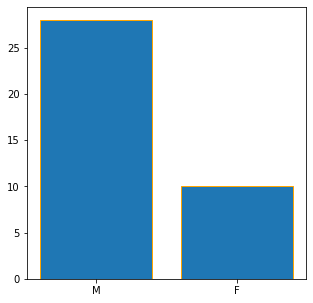

In [7]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,5)
counts = data["Genero"].value_counts()
plt.bar(counts.index, counts, edgecolor='orange')

#### Sector

<BarContainer object of 11 artists>

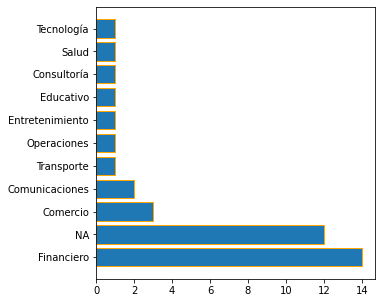

In [8]:
data.Sector.describe()
counts = data["Sector"].value_counts()
plt.barh(counts.index, counts, edgecolor='orange')

#### Pregrado

<BarContainer object of 12 artists>

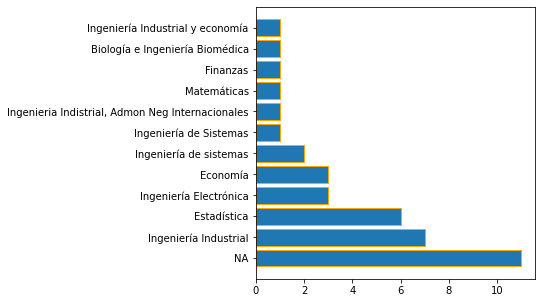

In [9]:
data.Pregrado.describe()
counts = data["Pregrado"].value_counts()
plt.barh(counts.index, counts, edgecolor='orange')

#### Pregrado - Clasificado por Facultad

<BarContainer object of 5 artists>

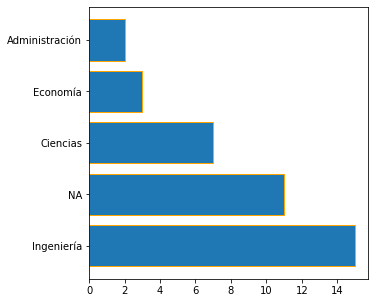

In [10]:
data.Facultad.describe()
counts = data["Facultad"].value_counts()
plt.barh(counts.index, counts, edgecolor='orange')

# Ejercicio 13.1

Analizar los patrones de escritura de cada estudiante

In [11]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
#stopword list to use
spanish_stopwords = stopwords.words('spanish')
from nltk.stem.snowball import SnowballStemmer

#spanish stemmer
stemmer = SnowballStemmer('spanish')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/NicolasSoto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/NicolasSoto/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Limpieza y pre-procesamiento de los Textos

Para facilitar el analisis de los de texto, los preparamos:
-Eliminando los números
-Tokenizando
-Excluyendo las palabras 'stop' irrelevantes o comunes (de, la, etc.)
-Lematizamos y estemizamos

In [12]:
from string import digits

def eliminate_numbers(texto):
    remove_digits = str.maketrans('', '', digits)
    texto = texto.translate(remove_digits)

    return texto

data['X'] = data['X'].apply(lambda x: eliminate_numbers(x))

#### Tokenización

In [13]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

data['X_clean'] = data['X'].apply(lambda x: tokenization(x.lower()))


#### Quitar Stop Words

In [14]:
def remove_stopwords(text):
    text = [word for word in text if word not in spanish_stopwords]
    return text
    
data['X_clean'] = data['X_clean'].apply(lambda x: remove_stopwords(x))

#### Stemming and Lammitization

In [15]:
def stemming(text):
    text = [stemmer.stem(word) for word in text]
    return text

data['X_clean'] = data['X_clean'].apply(lambda x: stemming(x))
data.head()

,ID,Genero,Pregrado,Sector,Edad,X,Facultad,X_clean
0,1,M,Matemáticas,Comercio,30.0,Dentro de las diferentes aplicaciones que tien...,Ciencias,"[dentr, diferent, aplic, seri, tiemp, vid, rea..."
1,2,M,NA,NA,,una serie de tiempo se enfoca en un individio ...,NA,"[seri, tiemp, enfoc, individi, mientr, dat, pa..."
2,3,M,NA,NA,,Mercados energeticos: Tras la liberación y des...,NA,"[merc, energet, tras, liber, desregul, merc, e..."
3,4,M,Estadística,Financiero,28.0,Las series de tiempo son una colección de obse...,Ciencias,"[seri, tiemp, coleccion, observ, obten, traves..."
4,5,M,NA,NA,,". Actualmente, la empresa de mascotas Laika qu...",NA,"[, actual, empres, mascot, laik, quier, optimi..."


### Análisis Patrones Escritura

#### Vocabulario: Conteo de Palabras únicas

Para cada estudiante, identificamos el número de palabras únicas utilizadas en los textos, con el objetivo de evaluar la riqueza lexica o de vocabulario.

In [16]:
def get_unique_words(text):
       
    vect = CountVectorizer(lowercase = True, stop_words=spanish_stopwords) 
    vect.fit(text)
    num_words = len(vect.vocabulary_)
   
    
    return num_words

data['Unique_Words'] = data['X_clean'].apply(lambda x: get_unique_words(x))
data.head()

,ID,Genero,Pregrado,Sector,Edad,X,Facultad,X_clean,Unique_Words
0,1,M,Matemáticas,Comercio,30.0,Dentro de las diferentes aplicaciones que tien...,Ciencias,"[dentr, diferent, aplic, seri, tiemp, vid, rea...",349
1,2,M,NA,NA,,una serie de tiempo se enfoca en un individio ...,NA,"[seri, tiemp, enfoc, individi, mientr, dat, pa...",101
2,3,M,NA,NA,,Mercados energeticos: Tras la liberación y des...,NA,"[merc, energet, tras, liber, desregul, merc, e...",351
3,4,M,Estadística,Financiero,28.0,Las series de tiempo son una colección de obse...,Ciencias,"[seri, tiemp, coleccion, observ, obten, traves...",396
4,5,M,NA,NA,,". Actualmente, la empresa de mascotas Laika qu...",NA,"[, actual, empres, mascot, laik, quier, optimi...",134


#### Vocabulario (# palabras únicas utilizadas)

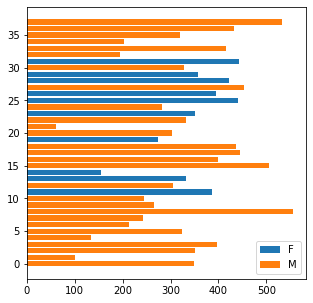

In [17]:
texto_F = data[data['Genero'] == 'F']['Unique_Words']
texto_M = data[data['Genero'] == 'M']['Unique_Words']
plt.barh(texto_F.index, texto_F,label = 'F' )
plt.barh(texto_M.index, texto_M, label = 'M' )
plt.legend()

Considerando que todos los textos tenian diferente longitud, para evaluar la riqueza de vocabulario corregimos por la longitud de los textos.

#### Longitud de Los Textos

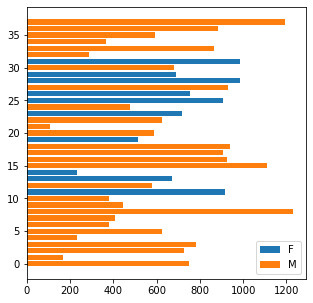

In [18]:
texto_F = data[data['Genero'] == 'F']['X_clean'].apply(lambda x: len(x) - len(' '))
texto_M = data[data['Genero'] == 'M']['X_clean'].apply(lambda x: len(x) - len(' '))
plt.barh(texto_F.index, texto_F,label = 'F' )
plt.barh(texto_M.index, texto_M, label = 'M' )
plt.legend()

#### Proporción Palabras Unicas / longitud del texto

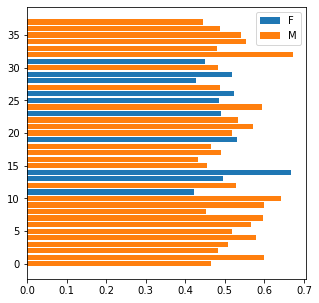

In [19]:
texto_F = data[data['Genero'] == 'F']['Unique_Words']/data[data['Genero'] == 'F']['X_clean'].apply(lambda x: len(x) - len(' '))
texto_M = data[data['Genero'] == 'M']['Unique_Words']/data[data['Genero'] == 'M']['X_clean'].apply(lambda x: len(x) - len(' '))
plt.barh(texto_F.index, texto_F,label = 'F' )
plt.barh(texto_M.index, texto_M, label = 'M' )
plt.legend()

Como se puede evidenciar, quien escribe textos más largos no necesariamente es aquel que conoce/utiliza más palabras.

#### Vocabulario: Palabras más utilizadas

Ahora, haremos un analisis de las palabras más utilizadas.
Empezaremos con una nube de text de las palabras más utilizadas por todos los estudiantes.

In [20]:
!pip install wordcloud

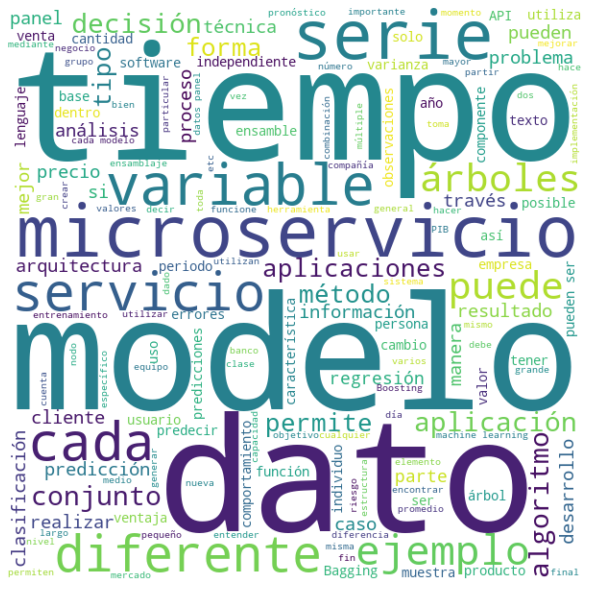

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 

textoWC = ' '.join(data.X)

wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = spanish_stopwords,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

No es una sorpresa,por la naturaleza de las preguntas de las tareas, que las palabras como 'dato', 'modelo', 'tiempo', 'información' y 'algortimos' sean frecuentes. Sin embargo, como vimos en la descripción demográfica, la población de estudiantes es diversa y por tanto es interesante evaluar los patrones de escritura de cada uno.
Para ello, utilizaremos 2 estudiantes para hacer un analisis granular: 
ID 31: F, Sector Salud, Pregrado Ingeniería Biomédica/Biologia
ID 35: M, Sector Telecomunicaciones, Pregrado Estadistica

#### Palabras Más Utilizadas para cada Estudiante

Creamos una función que nos muestra las n palabras más utilizadas por cada estudiante.
En este caso, dejamos n=15

In [22]:
def get_top_n_words(texto,n):
      
    vect = CountVectorizer()
    bag_of_words = vect.fit_transform(texto)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vect.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:n]

data['Top_Words'] = data['X_clean'].apply(lambda x: get_top_n_words(x, 15))
data.head()

,ID,Genero,Pregrado,Sector,Edad,X,Facultad,X_clean,Unique_Words,Top_Words
0,1,M,Matemáticas,Comercio,30.0,Dentro de las diferentes aplicaciones que tien...,Ciencias,"[dentr, diferent, aplic, seri, tiemp, vid, rea...",349,"[(diferent, 28), (permit, 15), (pued, 12), (se..."
1,2,M,NA,NA,,una serie de tiempo se enfoca en un individio ...,NA,"[seri, tiemp, enfoc, individi, mientr, dat, pa...",101,"[(maner, 7), (servici, 6), (mas, 6), (microser..."
2,3,M,NA,NA,,Mercados energeticos: Tras la liberación y des...,NA,"[merc, energet, tras, liber, desregul, merc, e...",351,"[(dat, 26), (model, 18), (tiemp, 15), (seri, 1..."
3,4,M,Estadística,Financiero,28.0,Las series de tiempo son una colección de obse...,Ciencias,"[seri, tiemp, coleccion, observ, obten, traves...",396,"[(decision, 13), (funcion, 11), (model, 11), (..."
4,5,M,NA,NA,,". Actualmente, la empresa de mascotas Laika qu...",NA,"[, actual, empres, mascot, laik, quier, optimi...",134,"[(model, 11), (tiemp, 10), (dat, 7), (seri, 6)..."


Para nuestros estudiante de estudio tenemos:

In [23]:
print("Las 15 palabras más utilizadas por el estudiante ID31:")
top_ID31= pd.DataFrame(data['Top_Words'].iloc[31])
print(top_ID31)

Las 15 palabras más utilizadas por el estudiante ID31:
           0   1
0        dat  22
1      tiemp  19
2        cad  16
3   document  11
4     utiliz  11
5      model  10
6    describ   9
7       pued   9
8   diferent   9
9     clinic   8
10       tip   8
11    permit   8
12   variabl   8
13    narrat   8
14   funcion   8


In [24]:
print("Las 15 palabras más utilizadas por el estudiante ID35:")
top_ID27= pd.DataFrame(data['Top_Words'].iloc[35])
print(top_ID27)

Las 15 palabras más utilizadas por el estudiante ID35:
            0   1
0       model  15
1        pued  10
2     servici   8
3      patron   8
4      permit   7
5      usuari   6
6       aplic   6
7       arbol   6
8     requier   5
9   solicitud   5
10    variabl   5
11      mejor   5
12      error   5
13   siguient   5
14       form   5


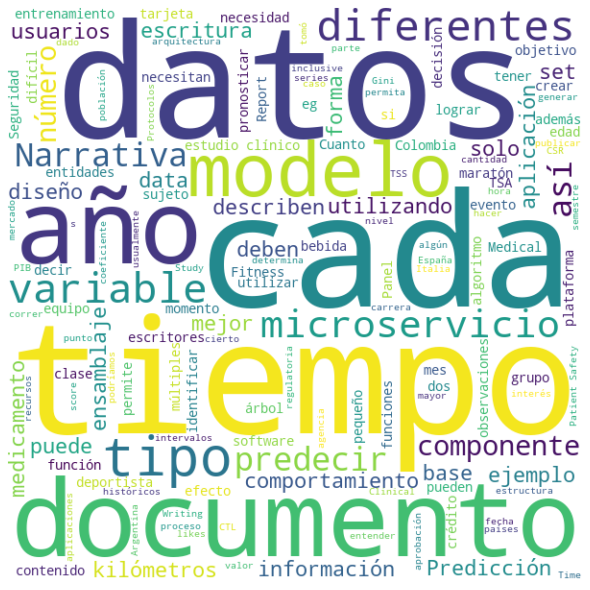

In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 

textoWC = data['X'].iloc[31]

wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = spanish_stopwords,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

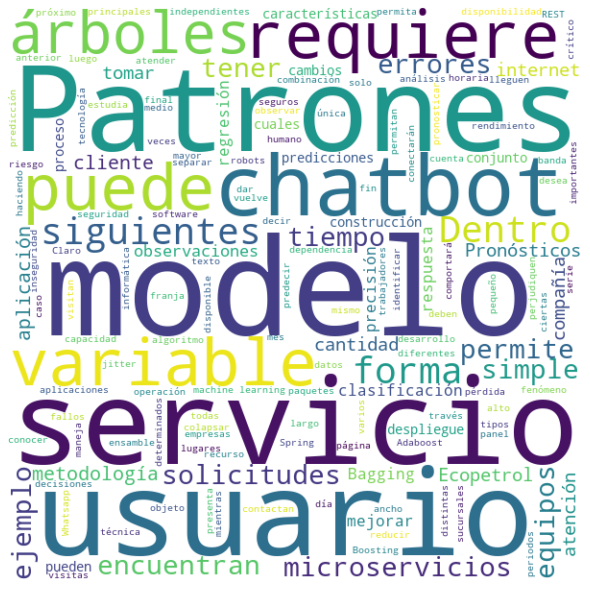

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 

textoWC = data['X'].iloc[35]

wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = spanish_stopwords,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Es interesante ver la diferencia las diferencias entre ID31 y ID35, donde ID31 utiliza palabras como clinica, documentos, narrativa, escritores y escritura, y ID35 palabras como patrones, usuarios, solicitudes, chatbot y Ecopetrol.
Sin duda, evidencia de los diferentes sectores en los que trabajan.

#### Term Frequency-Inverse Document Frequency (TF-IDF)

Aunque el conteo de palabras es interesante, también lo es identificar las palabras que utiliza un estudiante, pero que rara vez se encuentra en los textos de su compañero. Esto nos puede indicar las palabras que mayor peso tienen en cada texto (algo así como aquellas que más facilmente nos ayudarán a predecir de quien es el texto). Para esto utilizaremos TF-IDF

#### Palabra con Máximo peso por Estudiante

Con TF-IDF creamos una matriz indicando, para cada estudiante, cual es el peso de cada una de las palabras utilizadas.

In [27]:
vect = TfidfVectorizer(stop_words=spanish_stopwords)
weightVector = vect.fit_transform(data['X'])
weightVector_df = pd.DataFrame(weightVector.toarray(), columns=vect.get_feature_names())
weightVector_df

,abajo,abandona,abandono,abastecimiento,abejas,abiertas,abierto,aborda,abordar,abre,...,órdenes,última,último,últimos,única,únicamente,único,únicos,útil,útiles
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.023033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.042279,0.042279,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.024126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.051284,0.000000,0.000000,0.022132,0.000000,0.055826,0.032502
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.096601,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035031,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.035823,0.037254,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039240,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.019732,0.000000,0.000000,0.000000,0.000000,0.013436,0.000000,0.016946,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Con nuestra matriz de peso de palabras, identificamos cual es la palabra que tiene más peso por cada estudiante.

In [28]:
maxValueIndexObj = [weightVector_df.idxmax(axis=1)]
print("Palabra más frecuente para cada estudiante:")
print(maxValueIndexObj)

Palabra más frecuente para cada estudiante:
[0        diferentes
1               mas
2             datos
3       pronósticos
4            tiempo
5               gpt
6        aplicativo
7         elementos
8          lenguaje
9                of
10               va
11           modelo
12           tiempo
13         usuarios
14          últimos
15          restful
16          modelos
17      solicitudes
18      aprendizaje
19              for
20          árboles
21       climáticas
22            datos
23    funcionalidad
24              the
25          modelos
26        hipótesis
27          chatbot
28           tiempo
29      encontramos
30            datos
31       documentos
32        servicios
33          arboles
34              api
35         patrones
36           ballie
37           hatari
dtype: object]


Para nuestros estudiantes de estudio vemos que para ID31 es documentos y para ID35 es patrones.

Sabemos que las palabras más utilizadas son diferentes, ahora revisaremos una métrica que nos permita ver que tan diferentes son los textos. Para ello utilizaremos 'cosine similarity'

#### Text Similarity

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def cosine_distance_countVectorizer(text):
    
    X = np.array(text.values.tolist())

    vect = CountVectorizer()
    X_dtm = vect.fit_transform(text).todense()
    
    return cosine_similarity(X_dtm)

In [30]:
similarity_array = cosine_distance_countVectorizer(data.X)
similarity = pd.DataFrame(similarity_array)
similarity

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,1.000000,0.863231,0.939304,0.933561,0.889200,0.923439,0.899975,0.899866,0.925991,0.895447,...,0.939105,0.936269,0.910192,0.922384,0.872581,0.937904,0.849753,0.930622,0.946420,0.935664
1,0.863231,1.000000,0.859064,0.862637,0.829572,0.839804,0.840958,0.840077,0.840575,0.848905,...,0.862607,0.849280,0.834481,0.834644,0.825007,0.854159,0.787123,0.862516,0.865221,0.848101
2,0.939304,0.859064,1.000000,0.943041,0.916737,0.927007,0.931014,0.896490,0.925343,0.901919,...,0.938985,0.930221,0.899814,0.908941,0.870988,0.945256,0.848684,0.935978,0.954374,0.945235
3,0.933561,0.862637,0.943041,1.000000,0.923516,0.940911,0.931521,0.909548,0.925302,0.908443,...,0.940720,0.935420,0.920301,0.930308,0.886266,0.948159,0.868996,0.932613,0.955683,0.959825
4,0.889200,0.829572,0.916737,0.923516,1.000000,0.907095,0.921100,0.894364,0.898493,0.868664,...,0.906224,0.911049,0.878576,0.893032,0.855458,0.923931,0.847587,0.887622,0.913421,0.919615
5,0.923439,0.839804,0.927007,0.940911,0.907095,1.000000,0.913222,0.914255,0.935189,0.895702,...,0.939747,0.934855,0.913776,0.922177,0.890376,0.934227,0.868986,0.919125,0.943977,0.946635
6,0.899975,0.840958,0.931014,0.931521,0.921100,0.913222,1.000000,0.902028,0.906166,0.885291,...,0.927154,0.903886,0.877679,0.890679,0.871408,0.937041,0.857917,0.908612,0.928233,0.936091
7,0.899866,0.840077,0.896490,0.909548,0.894364,0.914255,0.902028,1.000000,0.907691,0.875620,...,0.900466,0.903901,0.894095,0.905217,0.880844,0.909423,0.840823,0.877632,0.914468,0.915950
8,0.925991,0.840575,0.925343,0.925302,0.898493,0.935189,0.906166,0.907691,1.000000,0.895112,...,0.935349,0.934360,0.923858,0.931907,0.882434,0.932397,0.851940,0.916573,0.939615,0.939946
9,0.895447,0.848905,0.901919,0.908443,0.868664,0.895702,0.885291,0.875620,0.895112,1.000000,...,0.918131,0.910002,0.897635,0.892229,0.854406,0.906343,0.813119,0.906063,0.916525,0.909271


Acá podemos encontrar que el coef de similitud entre ID31 y ID35 es 0.900797.

¿Cual será esa diferencia con un texto aleatorío, como 'Rín rín renacuajo'?

In [31]:
random_text = 'El hijo de rana, Rinrín renacuajo Salió esta mañana muy tieso y muy majo Con pantalón corto, corbata a la moda Sombrero encintado y chupa de boda. -¡Muchacho, no salgas!- le grita mamá pero él hace un gesto y orondo se va. Halló en el camino, a un ratón vecino Y le dijo: -¡amigo!- venga usted conmigo, Visitemos juntos a doña ratona Y habrá francachela y habrá comilona. A poco llegaron, y avanza ratón, Estírase el cuello, coge el aldabón, Da dos o tres golpes, preguntan: ¿quién es? -Yo doña ratona, beso a usted los pies ¿Está usted en casa? -Sí señor sí estoy, y celebro mucho ver a ustedes hoy; estaba en mi oficio, hilando algodón, pero eso no importa; bienvenidos son. Se hicieron la venia, se dieron la mano, Y dice Ratico, que es más veterano : Mi amigo el de verde rabia de calor, Démele cerveza, hágame el favor. Y en tanto que el pillo consume la jarra Mandó la señora traer la guitarra Y a renacuajo le pide que cante Versitos alegres, tonada elegante. -¡Ay! de mil amores lo hiciera, señora, pero es imposible darle gusto ahora, que tengo el gaznate más seco que estopa y me aprieta mucho esta nueva ropa. -Lo siento infinito, responde tía rata, aflójese un poco chaleco y corbata, y yo mientras tanto les voy a cantar una cancioncita muy particular. Mas estando en esta brillante función De baile y cerveza, guitarra y canción, La gata y sus gatos salvan el umbral, Y vuélvese aquello el juicio final Doña gata vieja trinchó por la oreja Al niño Ratico maullándole: ¡Hola! Y los niños gatos a la vieja rata Uno por la pata y otro por la cola Don Renacuajito mirando este asalto Tomó su sombrero, dio un tremendo salto Y abriendo la puerta con mano y narices, Se fue dando a todos noches muy felices Y siguió saltando tan alto y aprisa, Que perdió el sombrero, rasgó la camisa, se coló en la boca de un pato tragón y éste se lo embucha de un solo estirón Y así concluyeron, uno, dos y tres Ratón y Ratona, y el Rana después; Los gatos comieron y el pato cenó, ¡y mamá Ranita solita quedó'
random_text

'El hijo de rana, Rinrín renacuajo Salió esta mañana muy tieso y muy majo Con pantalón corto, corbata a la moda Sombrero encintado y chupa de boda. -¡Muchacho, no salgas!- le grita mamá pero él hace un gesto y orondo se va. Halló en el camino, a un ratón vecino Y le dijo: -¡amigo!- venga usted conmigo, Visitemos juntos a doña ratona Y habrá francachela y habrá comilona. A poco llegaron, y avanza ratón, Estírase el cuello, coge el aldabón, Da dos o tres golpes, preguntan: ¿quién es? -Yo doña ratona, beso a usted los pies ¿Está usted en casa? -Sí señor sí estoy, y celebro mucho ver a ustedes hoy; estaba en mi oficio, hilando algodón, pero eso no importa; bienvenidos son. Se hicieron la venia, se dieron la mano, Y dice Ratico, que es más veterano : Mi amigo el de verde rabia de calor, Démele cerveza, hágame el favor. Y en tanto que el pillo consume la jarra Mandó la señora traer la guitarra Y a renacuajo le pide que cante Versitos alegres, tonada elegante. -¡Ay! de mil amores lo hiciera, 

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def cosine_distance_countVectorizer(s1, s2, s3):

    vect = CountVectorizer()
    X_dtm = vect.fit_transform([s1, s2, s3]).todense()
    
    return cosine_similarity(X_dtm)

In [33]:
s1=data['X'].iloc[35]
s2=random_text
s3 =data['X'].iloc[31]

cosine_distance_countVectorizer(s1, s2, s3)

array([[1.        , 0.55270449, 0.90079737],
       [0.55270449, 1.        , 0.60118939],
       [0.90079737, 0.60118939, 1.        ]])

Como lo esperabamos, los textos de las tareas para los dos estudiantes es muy diferente al poema Rín Rín Renacuajo.

0.5527 ID35 vs. Poema

0.6011 ID31 vs. Poema

0.9007 ID31 vs. ID35

#### Representación Gráfica de similitud entre textos

<AxesSubplot:>

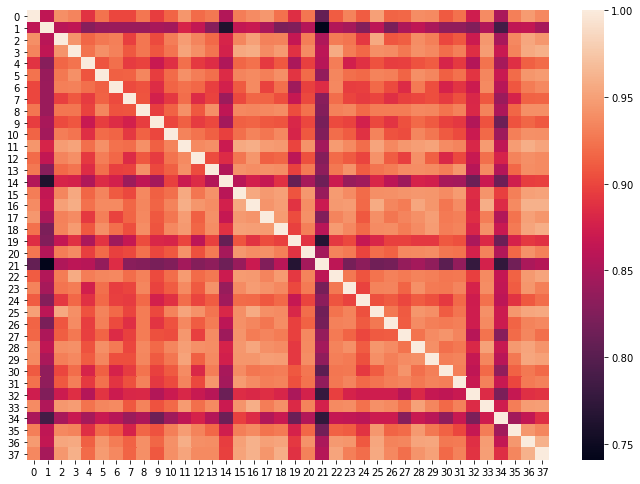

In [34]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
sn.heatmap(similarity)


Visualmente, podemos ver que los textos de algunos estudiantes son más diferentes a los del resto, eg, ID1, ID14, ID21 y ID34.
También vemos la similitud 0.90 entre nuestros estudiantes de interés.

Por último, quisimos evaluar cuales eran los textos que más se parecian entre sí.
Para esto, extragimos el valor más alto para cada pareja de estudiantes (diferente a 1, dado que eso es la comparación del texto con el mismo)

In [35]:
most_similar_val = similarity.apply(lambda row: row.nlargest(2).values[1],axis=1)
most_similar = similarity.apply(lambda x: similarity.index[x.argsort()[::-1][1]], axis=1)
#pd.DataFrame(most_similar,most_similar_val)

text_sim = pd.DataFrame(most_similar, columns = ['Student'])
text_sim['Cosine_Similarity'] = np.array(most_similar_val)
text_sim.sort_values(['Cosine_Similarity'])

,Student,Cosine_Similarity
1,14,0.878818
21,19,0.885501
32,14,0.896231
34,1,0.896609
14,19,0.897424
19,14,0.909500
9,21,0.918131
7,1,0.920176
24,21,0.922867
4,34,0.929456


En esta tabla encontramos cual es el texto que más se parece al del estudiante en la primera columna. Es decir, el texto que más se parece al del ID1 es ID14, sin embargo en nuestra tabla (sorted), vemos que estos no son tan parecidos como lo son los de ID37 y ID21.

ID37: M, Pregrado Economía, Sector Financiero
ID21: M, Pregrado Ingeniería, Sector Tecnología


# Ejercicio 13.2
Crear un clasificador para predecir el género de cada estudiante

In [36]:
data['Genero'] = pd.factorize(data.Genero)[0]

Para este punnto se van a plantear 3 modelelos y sus respectivos procesos de calibración

### Decision Tree Classifier

#### DT con TD-IDF como embedings

In [37]:
#stopword list to use
spanish_stopwords = stopwords.words('spanish')

# Modelo de Arboles de Clasificación
from sklearn.tree import DecisionTreeClassifier

vect = TfidfVectorizer(stop_words=spanish_stopwords)
X_dtm = vect.fit_transform(data.X)
X_dtm=pd.DataFrame(X_dtm.toarray())

y = data.Genero
y.describe()

clf = DecisionTreeClassifier(max_depth=1,random_state=1)
pd.Series(cross_val_score(clf, X_dtm, y, cv=10, scoring='accuracy')).describe()

count    10.000000
mean      0.566667
std       0.259986
min       0.000000
25%       0.500000
50%       0.708333
75%       0.750000
max       0.750000
dtype: float64

Para los vectores TD-IDF se obtiene un accuracy de 0.566667 despues de hacer CV.

#### DT con conteo de palabras CountVectorizar como embedings

In [38]:
#stopword list to use
spanish_stopwords = stopwords.words('spanish')

#spanish stemmer
stemmer = SnowballStemmer('spanish')

# Modelo de Arboles de Clasificación
from sklearn.tree import DecisionTreeClassifier

vect = CountVectorizer(stop_words=spanish_stopwords)
X_dtm = vect.fit_transform(data.X)
X_dtm.shape
X_dtm=pd.DataFrame(X_dtm.toarray())


clf = DecisionTreeClassifier(max_depth=1,random_state=1)
pd.Series(cross_val_score(clf, X_dtm, y, cv=10, scoring='accuracy')).describe()

count    10.000000
mean      0.658333
std       0.164101
min       0.250000
25%       0.666667
50%       0.750000
75%       0.750000
max       0.750000
dtype: float64

Para los vectores conteo de palabras se obtiene un accuracy de 0.658333 despues de hacer CV.

Hay una mejor precisión con los vectores de conteo de palabras que con el TD-IDF para este modelo, a continuacuón de hace tunning con el embeding de conteo de palabras.

#### Calibración de parámetros

In [39]:
#Rango de calibracion de parametro de profundidad
max_depth_range = np.arange(1, 8)

#lista para almacenar los scores para cada valor de profundidad
accuracy_scores = []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_dtm, y, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

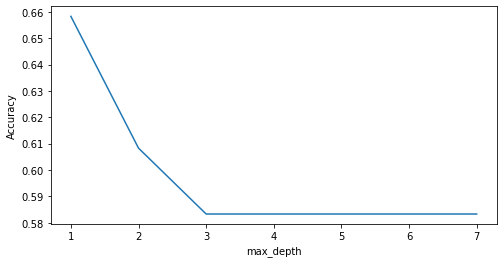

In [40]:
plt.rcParams["figure.figsize"] = (8,4)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [41]:
# Mostar mejora precision y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6583333333333334, 1)

In [42]:
# max_depth=1 fue el mejor, se correra un DT usando este parametro.
clf = DecisionTreeClassifier(max_depth=1, random_state=1)
clf.fit(X_dtm, y)

DecisionTreeClassifier(max_depth=1, random_state=1)

In [43]:
pd.Series(cross_val_score(clf, X_dtm, y, cv=10)).describe()

count    10.000000
mean      0.658333
std       0.164101
min       0.250000
25%       0.666667
50%       0.750000
75%       0.750000
max       0.750000
dtype: float64

In [44]:
DT_accuracy=0.658333

El modelo calibrado presenta el mismo desempeño que el modelo por default, aunque en si se puede concluir que el genero de los estudiantes no tiene un alto nivel de predictibilidad con este modelo.

### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.35, random_state=1)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

predict_rf_test  = rf.predict(x_test)

accuracy_score(y_test, predict_rf_test)

0.7142857142857143

RF sin calibrar tiene una precisión de 0.714285 

In [46]:
random_grid = {'n_estimators': range(100, 500, 10),
               'max_features': ['auto', 'sqrt'],
               'max_depth': range(1, 5)}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               scoring = 'accuracy', 
                               n_iter = 2, 
                               cv = 5, 
                               verbose=2, 
                               random_state=1, 
                               n_jobs = -1)

rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(1, 5),
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': range(100, 500, 10)},
                   random_state=1, scoring='accuracy', verbose=2)

In [47]:
rf_random.best_params_, rf_random.best_score_, rf_random.best_estimator_

({'n_estimators': 470, 'max_features': 'auto', 'max_depth': 1},
 0.75,
 RandomForestClassifier(max_depth=1, n_estimators=470))

La mejor combinación es: *n_estimators=470*, *max_features=auto* y *max_depth=1.

In [48]:
rf = RandomForestClassifier(n_estimators=470, max_features="auto", max_depth=1, random_state=1)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=1, n_estimators=470, random_state=1)

In [49]:
predict_rf_train = rf.predict(x_train)
predict_rf_test  = rf.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score

RF_accuracy=accuracy_score(y_test, predict_rf_test)
RF_accuracy

0.7142857142857143

Para RF la calibración no mejoró el resultado en terminos de precisión

In [51]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predict_rf_test)

array([[10,  0],
       [ 4,  0]])

In [52]:
tn, fp, fn, tp = confusion_matrix(y_test, predict_rf_test).ravel()
(tn, fp, fn, tp)

(10, 0, 4, 0)

Segun la matriz de confusión el modelo está prediciendo todas las observacion en una categoria, esto pude ser tambien consecuencia de trabajar con muy pocos datos para este tipo de modelos.

### XG Boost

In [53]:
from xgboost import XGBClassifier
clf_xgb = XGBClassifier()
clf_xgb.fit(x_train, y_train)

predict_rf_test  = clf_xgb.predict(x_test)

accuracy_score(y_test, predict_rf_test)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:51:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6428571428571429

#### Calibración de parámetros

In [54]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier()

param_dist = {'colsample_bytree': [0.01, 0.1, 0.5, 1],
              'learning_rate': [0.01, 0.1, 0.5, 1],
              'gamma': [0.01, 0.1, 5, 100],
             }

clf = RandomizedSearchCV(clf_xgb, 
                         param_distributions = param_dist,
                         cv = 6,  
                         n_iter = 5, 
                         scoring = 'accuracy', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1,
                         random_state=1)

clf.fit(x_train, y_train)

Fitting 6 folds for each of 5 candidates, totalling 30 fits


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:51:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=6, error_score=0,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_e...one,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                               

In [55]:
clf.best_params_, clf.best_score_, clf.best_estimator_

({'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 1},
 0.7916666666666666,
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.01, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None))

La mejor combinación es: *learning_rate=0.01*, *gamma=0.1* y *colsample_bytree=1*.

In [56]:
xgboost = XGBClassifier(learning_rate=0.01, gamma=0.1, colsample_bytree=1, random_state=1)
xgboost.fit(x_train, y_train)

[21:51:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
predict_xgboost_train = xgboost.predict(x_train)
predict_xgboost_test  = xgboost.predict(x_test)

In [58]:
XGBoost_accuracy=accuracy_score(y_test, predict_xgboost_test)
XGBoost_accuracy

0.6428571428571429

### Resultados

In [59]:
Resultados={'Decision Tree accuracy': DT_accuracy,
            'Random Forest accuracy': RF_accuracy,
            'XGBoost_accuracy      ': XGBoost_accuracy,}

Resultados

{'Decision Tree accuracy': 0.658333,
 'Random Forest accuracy': 0.7142857142857143,
 'XGBoost_accuracy      ': 0.6428571428571429}

### Conclusiones

-El modelo que mejor permite predecir el género a partir de los textos de las tareas de los estudiantes es el modelo de Random Forest (Accuracy)

-Se presume que dada la poca cantidad de datos y el hecho de que la variable a predecir es categorica con solo 2 opciones, la exactitud obtenida puede no ser tan confiable, se sugiere repetir el ejercicio con una muestra mayor.

-La clases de la variable 'Genero' no estan balanceadas y esto sumado al hecho de tener pocas observaciones puede dificultar la implementación de ciertos modelos. 

-El género es medianamente predecible según la frecuencia de uso de las palabras de los estudiantes.

# Ejercicio 13.3
Crear un modelo de clasificación para predecir la industria en la que trabajan los estudiantes

### Decision Tree Classifier

#### DT con TD-IDF como embeding 

In [84]:
vect = TfidfVectorizer(stop_words=spanish_stopwords)
X_dtm = vect.fit_transform(data.X)
X_dtm=pd.DataFrame(X_dtm.toarray())

data['Sector'] = pd.factorize(data.Sector)[0]

y = data.Sector

clf = DecisionTreeClassifier(max_depth=1,random_state=1)
pd.Series(cross_val_score(clf, X_dtm, y, cv=10, scoring='accuracy')).describe()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


count    10.000000
mean      0.483333
std       0.183417
min       0.250000
25%       0.312500
50%       0.500000
75%       0.625000
max       0.750000
dtype: float64

#### DT con conteo de palabras CountVectorizar como embeding 

In [85]:
#stopword list to use
spanish_stopwords = stopwords.words('spanish')

#spanish stemmer
stemmer = SnowballStemmer('spanish')

# Modelo de Arboles de Clasificación
from sklearn.tree import DecisionTreeClassifier

vect = CountVectorizer(ngram_range=(1,2),stop_words=spanish_stopwords)
X_dtm = vect.fit_transform(data.X)
#X_dtm=pd.DataFrame(X_dtm.toarray())

clf = DecisionTreeClassifier(max_depth=1,random_state=1)
pd.Series(cross_val_score(clf, X_dtm, y, cv=10, scoring='accuracy')).describe()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


count    10.000000
mean      0.583333
std       0.161971
min       0.250000
25%       0.500000
50%       0.583333
75%       0.729167
max       0.750000
dtype: float64

Hay una mejor precisión con los vectores de conteo de n-gramas (en este caso bi-gramas) que con el TD-IDF para este modelo, a continuacuón de hace tunning con el embeding de conteo de palabras.

#### Calibración de parámetros

In [87]:
#Rango de calibracion de parametro de profundidad
max_depth_range = np.arange(1, 6)

#lista para almacenar los scores para cada valor de profundidad
accuracy_scores = []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_dtm, y, cv=10, scoring='accuracy').mean())

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packag

Text(0, 0.5, 'Accuracy')

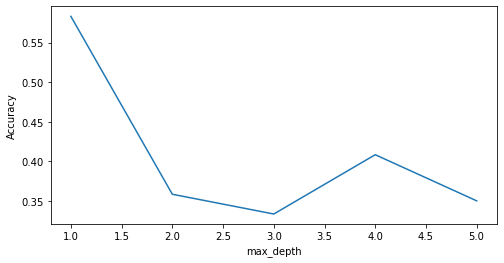

In [88]:
plt.rcParams["figure.figsize"] = (8,4)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [89]:
# Mostar mejora precision y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.5833333333333334, 1)

In [90]:
# max_depth=1 fue el mejor, se correra un DT usando este parametro.
clf = DecisionTreeClassifier(max_depth=1, random_state=1)
clf.fit(X_dtm, y)

DecisionTreeClassifier(max_depth=1, random_state=1)

In [91]:
pd.Series(cross_val_score(clf, X_dtm, y, cv=10)).describe()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


count    10.000000
mean      0.583333
std       0.161971
min       0.250000
25%       0.500000
50%       0.583333
75%       0.729167
max       0.750000
dtype: float64

In [92]:
DT_accuracy=0.583333

Para DT la calibración no tiene una mejora respecto a la métrica de desempeño del modelo.

### Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.35, random_state=1)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

predict_rf_test  = rf.predict(x_test)

accuracy_score(y_test, predict_rf_test)

0.6428571428571429

RF sin calibrar tiene una precisión de 0.64

In [100]:
random_grid = {'n_estimators': range(100, 500, 10),
               'max_features': ['auto', 'sqrt'],
               'max_depth': range(1, 15)}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               scoring = 'accuracy', 
                               n_iter = 2, 
                               cv = 5, 
                               verbose=2, 
                               random_state=1, 
                               n_jobs = -1)

rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(1, 15),
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': range(100, 500, 10)},
                   random_state=1, scoring='accuracy', verbose=2)

In [101]:
rf_random.best_params_, rf_random.best_score_, rf_random.best_estimator_

({'n_estimators': 450, 'max_features': 'sqrt', 'max_depth': 3},
 0.49000000000000005,
 RandomForestClassifier(max_depth=3, max_features='sqrt', n_estimators=450))

La mejor combinación es: *n_estimators=450*, *max_features=auto* y *max_depth=3.

In [102]:
rf = RandomForestClassifier(n_estimators=450, max_features="auto", max_depth=3, random_state=1)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=450, random_state=1)

In [103]:
predict_rf_train = rf.predict(x_train)
predict_rf_test  = rf.predict(x_test)

In [104]:
from sklearn.metrics import accuracy_score

RF_accuracy=accuracy_score(y_test, predict_rf_test)
RF_accuracy

0.6428571428571429

RF calibrado tiene la mimsa métrica de desempeño una vez calibrado

In [99]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predict_rf_test)

array([[0, 0, 1, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0]])

### XG Boost

In [105]:
clf_xgb = XGBClassifier()
clf_xgb.fit(x_train, y_train)

predict_rf_test  = clf_xgb.predict(x_test)

accuracy_score(y_test, predict_rf_test)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:58:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.42857142857142855

#### Calibración de parámetros

In [106]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier()

param_dist = {'colsample_bytree': [0.01, 0.1, 0.5, 1],
              'learning_rate': [0.01, 0.1, 0.5, 1],
              'gamma': [0.01, 0.1, 5, 50],
             }

clf = RandomizedSearchCV(clf_xgb, 
                         param_distributions = param_dist,
                         cv = 6,  
                         n_iter = 5, 
                         scoring = 'accuracy', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1,
                         random_state=1)

clf.fit(x_train, y_train)

Fitting 6 folds for each of 5 candidates, totalling 30 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:58:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=6, error_score=0,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_e...None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                              

In [107]:
clf.best_params_, clf.best_score_, clf.best_estimator_

({'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 1},
 0.5,
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.01, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1,
               objective='multi:softprob', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=None, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None))

La mejor combinación es: *learning_rate=0.01*, *gamma=0.1* y *colsample_bytree=1*.

In [108]:
xgboost = XGBClassifier(learning_rate=0.01, gamma=0.1, colsample_bytree=1, random_state=1)
xgboost.fit(x_train, y_train)

[21:59:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [109]:
predict_xgboost_train = xgboost.predict(x_train)
predict_xgboost_test  = xgboost.predict(x_test)

In [110]:
XGBoost_accuracy=accuracy_score(y_test, predict_xgboost_test)
XGBoost_accuracy

0.42857142857142855

XGBoost genera un mejor accuracy con la calibración.

- Los modelos calibrados no variaron de los modelos por default.

### Resultados

In [111]:
Resultados={'Decision Tree accuracy': DT_accuracy,
            'Random Forest accuracy': RF_accuracy,
            'XGBoost_accuracy      ': XGBoost_accuracy,}

Resultados

{'Decision Tree accuracy': 0.583333,
 'Random Forest accuracy': 0.6428571428571429,
 'XGBoost_accuracy      ': 0.42857142857142855}

### Conclusiones

-El sector al que pertenece cada estudiante es relativamente poco predecible, el mejor resultado se obtiene con el Random Forest.

-Other o NA, representa una de las categorias con mayor peso en la variable de salida.